# Credit Risk Evaluator

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [2]:
# Import the data
df = pd.read_csv('Resources/lending_data.csv')
df

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [4]:
df['loan_status'].value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

The Random forest predictor will be more precise than the logistic regression predictor

## Split the Data into Training and Testing Sets

In [5]:
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

In [6]:
y 

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [7]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
X_train

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
29175,8600.0,6.792,44500,0.325843,3,0,14500
23020,7800.0,6.419,41000,0.268293,2,0,11000
31269,10000.0,7.386,50100,0.401198,4,1,20100
35479,9300.0,7.093,47300,0.365751,3,0,17300
13470,9200.0,7.045,46900,0.360341,3,0,16900
...,...,...,...,...,...,...,...
20609,7200.0,6.177,38700,0.224806,1,0,8700
21440,10000.0,7.389,50100,0.401198,4,1,20100
73349,10200.0,7.463,50800,0.409449,4,1,20800
50057,11100.0,7.838,54400,0.448529,5,1,24400


In [9]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train_scaled

array([[-0.57708952, -0.56367666, -0.5652314 , ..., -0.43489843,
        -0.67289855, -0.5652314 ],
       [-0.95927354, -0.98302549, -0.98332378, ..., -0.96014741,
        -0.67289855, -0.98332378],
       [ 0.09173251,  0.10413354,  0.10371642, ...,  0.09035056,
         1.04334691,  0.10371642],
       ...,
       [ 0.18727852,  0.19070153,  0.18733489, ...,  0.09035056,
         1.04334691,  0.18733489],
       [ 0.61723554,  0.61229888,  0.61737277, ...,  0.61559954,
         1.04334691,  0.61737277],
       [ 0.37837052,  0.3807014 ,  0.37846284, ...,  0.61559954,
         1.04334691,  0.37846284]])

## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

In [11]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier

LogisticRegression(max_iter=10000)

In [12]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [13]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


In [14]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

In [15]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748


In [16]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_true, y_pred)
cm

array([[18663,   102],
       [   56,   563]])

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [18]:
predictions = clf.predict(X_test)
>>> disp = ConfusionMatrixDisplay(confusion_matrix=cm,
...                               display_labels=clf.classes_)
>>> disp.plot()
<...>
>>> plt.show()

SyntaxError: invalid syntax (2278617580.py, line 5)

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp

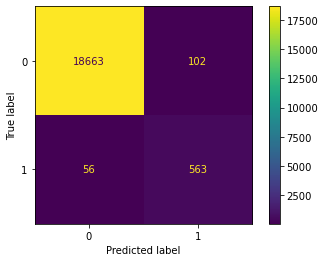

In [20]:
import matplotlib.pyplot as plt
disp.plot()
plt.show()

They preform about the same. How does that compare to your prediction? Replace the text in this markdown cell with your answers to these questions.*